# Medical Diagnosis with Support Vector Machines

## Import Libraries



In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Get Data

In [2]:
column_names = ["pregnancies", "glucose", "bpressure", "skinfold", "insulin", "bmi", "pedigree", "age", "class"]
df = pd.read_csv('data.csv', names=column_names)
print(df.shape)
df.head()

(768, 9)


,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Extract Features

In [3]:
X = df.iloc[:, :-1].values
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


## Extract Class Labels

In [4]:
y = df.iloc[:, -1].values
pd.DataFrame(y).head()

,0
0,1
1,0
2,1
3,0
4,1


## Split Dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (576, 8)
X_test shape:  (192, 8)
y_train shape:  (576,)
y_test shape:  (192,)


## Normalize Features

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print('Normalized X_train')
print(pd.DataFrame(X_train).head())
print('Normalized X_test')
print(pd.DataFrame(X_test).head())

Normalized X_train
          0         1         2         3         4         5         6  \
0  2.430750  0.006368  0.462583 -0.250242 -0.734006 -0.691828 -0.651017   
1 -1.107865  0.516730  0.767211  0.382781 -0.734006 -0.591354 -0.740829   
2 -0.812980 -0.408300  0.970296 -0.123637 -0.734006 -0.616473 -0.198752   
3 -1.107865  1.856428 -0.959013  0.952502  0.686903  0.727369 -0.022336   
4 -0.518096 -0.982457  0.056413 -0.250242 -0.734006 -0.591354 -1.209132   

          7  
0  2.492283  
1  2.234738  
2 -0.769952  
3 -0.941648  
4 -0.941648  
Normalized X_test
          0         1         2         3         4         5         6  \
0  0.576258 -0.866040 -0.425457  0.779767  0.428416  0.007242 -1.091176   
1  0.271460  0.321248  0.562038 -1.182908 -0.586094 -0.674841 -0.826642   
2 -0.338135 -0.450489  0.123151 -1.182908 -0.586094 -0.806010 -0.771640   
3 -0.033337 -0.658265 -0.096292  1.147769 -0.586094  0.112177 -0.934027   
4 -0.033337 -0.747311 -0.754622 -0.140237 -0.191563 -

## Dimensional Reduction with PCA

1) with SVM

In [9]:
from sklearn.decomposition import PCA
for k in range(1, 8):
    pca = PCA(n_components=k)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    
    X_train = pca.fit_transform(X_train)
    
    model = svm.SVC(kernel='rbf')
    model.fit(X_train, y_train)
    
    X_test = pca.transform(X_test)
    
    y_pred = model.predict(X_test)
    print(f'accuracy of n_components {k}: ', accuracy_score(y_test, y_pred))

accuracy of n_components 1:  0.765625
accuracy of n_components 2:  0.703125
accuracy of n_components 3:  0.7083333333333334
accuracy of n_components 4:  0.71875
accuracy of n_components 5:  0.7291666666666666
accuracy of n_components 6:  0.7760416666666666
accuracy of n_components 7:  0.765625


2) with XGBoost

In [10]:
from xgboost import XGBClassifier
from xgboost import DMatrix

/Users/kuangsmacbook/miniforge3/envs/tf_m1/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [11]:
for k in range(1, 8):
    pca = PCA(n_components=k)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    
    X_train = pca.fit_transform(X_train)
    
    model = XGBClassifier()
    model.fit(X_train, y_train)
    
    X_test = pca.transform(X_test)
    
    y_pred = model.predict(X_test)
    print(f'accuracy of n_components {k}: ', accuracy_score(y_test, y_pred))

/Users/kuangsmacbook/miniforge3/envs/tf_m1/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kuangsmacbook/miniforge3/envs/tf_m1/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kuangsmacbook/miniforge3/envs

[10:35:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of n_components 1:  0.6875
[10:35:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of n_components 2:  0.6614583333333334
[10:35:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy of n_components 3:  0.71875
[10:35:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objectiv

/Users/kuangsmacbook/miniforge3/envs/tf_m1/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/kuangsmacbook/miniforge3/envs/tf_m1/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## SVM Kernels test

In [18]:
for k in range(1, 8):
    pca = PCA(n_components=k)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    for j in ('linear', 'poly','rbf','sigmoid'):
        model = svm.SVC(kernel=j)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(f'accuracy for {j}, n_component of {k}: ', accuracy_score(y_test, y_pred))

accuracy for linear, n_component of 1:  0.7239583333333334
accuracy for poly, n_component of 1:  0.7239583333333334
accuracy for rbf, n_component of 1:  0.7239583333333334
accuracy for sigmoid, n_component of 1:  0.5989583333333334
accuracy for linear, n_component of 2:  0.734375
accuracy for poly, n_component of 2:  0.7239583333333334
accuracy for rbf, n_component of 2:  0.7239583333333334
accuracy for sigmoid, n_component of 2:  0.65625
accuracy for linear, n_component of 3:  0.7395833333333334
accuracy for poly, n_component of 3:  0.71875
accuracy for rbf, n_component of 3:  0.7291666666666666
accuracy for sigmoid, n_component of 3:  0.6510416666666666
accuracy for linear, n_component of 4:  0.7291666666666666
accuracy for poly, n_component of 4:  0.7291666666666666
accuracy for rbf, n_component of 4:  0.7447916666666666
accuracy for sigmoid, n_component of 4:  0.6614583333333334
accuracy for linear, n_component of 5:  0.7447916666666666
accuracy for poly, n_component of 5:  0.72395

## Try XGBoost

In [16]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred))

[10:41:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy:  0.7447916666666666


/Users/kuangsmacbook/miniforge3/envs/tf_m1/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


## Instantiating the Best Model

In [19]:
model = svm.SVC(kernel='linear')
pca = PCA(n_components=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
    
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('accuracy: ', accuracy_score(y_test, y_pred))

accuracy:  0.8125


## Making a single prediction

In [21]:
# "pregnancies", "glucose", "bpressure", 
# "skinfold", "insulin", "bmi", 
# "pedigree", "age", "class"
patient = sc.transform([[1., 200., 75., 40., 0., 45., 1.5, 20.]])
patient = pca.transform(patient)
model.predict(patient)

array([1])

## Comparison to All-Zero Prediction

In [22]:
y_zero = np.zeros(y_test.shape)
print(accuracy_score(y_test, y_zero))

0.6770833333333334


## Precision and Recall

In [23]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       130
           1       0.75      0.63      0.68        62

    accuracy                           0.81       192
   macro avg       0.79      0.76      0.78       192
weighted avg       0.81      0.81      0.81       192



<AxesSubplot:>

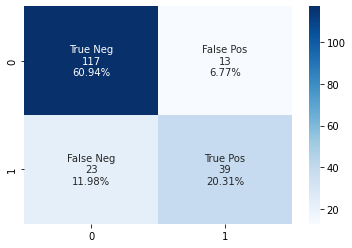

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')